In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top5000youtubechannels/top-5000-youtube-channels.csv


First we load the Dataset into a Dataframe.

In [2]:
df=pd.read_csv("/kaggle/input/top5000youtubechannels/top-5000-youtube-channels.csv")

# 1. **Display All Rows Except the Last 5 rows Using Head Method**

In [3]:
df.head(-5) #negative values is use for this.

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
...,...,...,...,...,...,...
4990,"4,991st",B+,Ho Ngoc Ha's Official Channel,208,--,127185704
4991,"4,992nd",B+,Toys to Learn Colors,11,663114,141933264
4992,"4,993rd",B+,КАZКА,25,131766,74304638
4993,"4,994th",B+,United CUBE (CUBE Entertainment…,1055,1586835,371299166


# 2. **Display All Rows Except the First 5 rows Using Tail Method**

In [4]:
df.tail(-5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
5,6th,A++,Movieclips,30243,17149705,16618094724
6,7th,A++,netd müzik,8500,11373567,23898730764
7,8th,A++,ABS-CBN Entertainment,100147,12149206,17202609850
8,9th,A++,Ryan ToysReview,1140,16082927,24518098041
9,10th,A++,Zee Marathi,74607,2841811,2591830307
...,...,...,...,...,...,...
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764


# 3. **Find Shape of Our Dataset (Number of Rows And Number of Columns)**

In [5]:
print("Number of Rows:",df.shape[0],"Number of Columns:",df.shape[1])

Number of Rows: 5000 Number of Columns: 6


# 4. **Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           5000 non-null   object
 1   Grade          5000 non-null   object
 2   Channel name   5000 non-null   object
 3   Video Uploads  5000 non-null   object
 4   Subscribers    5000 non-null   object
 5   Video views    5000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


# 5. **Get Overall Statistics About The Dataframe**

In [7]:
pd.options.display.float_format='{:.2f}'.format #for converting the exponential data to float which is easy to compute or perform any operation.

In [8]:
df.describe(include="all")


,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
count,5000,5000,5000,5000,5000,5000.00
unique,5000,6,4993,2286,4612,NaN
top,1st,B+,Thơ Nguyễn,26,--,NaN
freq,1,2956,2,17,387,NaN
mean,NaN,NaN,NaN,NaN,NaN,1071449400.15
std,NaN,NaN,NaN,NaN,NaN,2003843972.12
min,NaN,NaN,NaN,NaN,NaN,75.00
25%,NaN,NaN,NaN,NaN,NaN,186232945.75
50%,NaN,NaN,NaN,NaN,NaN,482054780.00
75%,NaN,NaN,NaN,NaN,NaN,1124367826.75


# 6. **Data Cleaning  (Replace '--'  to NaN)**

In [9]:
df.replace('--',np.NaN,regex=True,inplace=True)

# 7. **Check Null Values In The Dataset**

In [10]:
df.isnull().sum()

Rank               0
Grade              0
Channel name       0
Video Uploads      6
Subscribers      387
Video views        0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

Rank             0
Grade            0
Channel name     0
Video Uploads    0
Subscribers      0
Video views      0
dtype: int64

# 8. **Data Cleaning [ Rank Column ]**

In [13]:
df.head(5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


we have to remove the string from rank column i.e., 1st->1.

In [14]:
df['Rank']=df['Rank'].str[0:-2]

In [15]:
df.tail()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,"4,996",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998",B+,Mastersaint,110,3265735,311758426
4998,"4,999",B+,Bruce McIntosh,3475,32990,14563764
4999,"5,000",B+,SehatAQUA,254,21172,73312511


Now we also have to remove the ','.

In [16]:
df['Rank']=df['Rank'].str.replace(',','')

In [17]:
df

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1,A++,Zee TV,82757,18752951,20869786591
1,2,A++,T-Series,12661,61196302,47548839843
2,3,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4,A++,SET India,27323,31180559,22675948293
4,5,A++,WWE,36756,32852346,26273668433
...,...,...,...,...,...,...
4995,4996,B+,Uras Benlioğlu,706,2072942,441202795
4996,4997,B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,4998,B+,Mastersaint,110,3265735,311758426
4998,4999,B+,Bruce McIntosh,3475,32990,14563764


In [18]:
df['Rank'].dtypes

dtype('O')

Now we have to convert its datatype to int for further computations.

In [19]:
df['Rank']=df['Rank'].astype(int)

In [20]:
df['Rank'].dtypes

dtype('int64')

# 9. **Data Cleaning [ Video Uploads & Subscribers ]**

Since both the columns contains numerical values so we convert their datatypes to int.

In [21]:
df['Video Uploads'].dtypes

dtype('O')

In [22]:
df['Video Uploads']=df['Video Uploads'].astype(int)

In [23]:
df['Video Uploads'].dtypes #Datatype changed Successfully.

dtype('int64')

In [24]:
df['Subscribers'].dtypes

dtype('O')

In [25]:
df['Subscribers']=df['Subscribers'].astype(int)

In [26]:
df['Subscribers'].dtypes #Datatype changed Successfully.

dtype('int64')

# 10. **Data Cleaning [ Grade Column ]**

In [27]:
df['Grade'].unique()

array(['A++ ', 'A+ ', 'A ', 'A- ', 'B+ '], dtype=object)

We map these values with corresponding numerical value

In [28]:
df['Grade']=df['Grade'].map({'A++ ':5,'A+ ':4,'A ':3,'A- ':2,'B+ ':1})

In [29]:
df['Grade'].dtypes

dtype('int64')

# 11. **Find Average Views For Each Channel**

In [30]:
df['Avg_views']=df['Video views'] / df['Video Uploads']

In [31]:
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Avg_views
0,1,5,Zee TV,82757,18752951,20869786591,252181.53
1,2,5,T-Series,12661,61196302,47548839843,3755535.89
2,3,5,Cocomelon - Nursery Rhymes,373,19238251,9793305082,26255509.60
3,4,5,SET India,27323,31180559,22675948293,829921.62
4,5,5,WWE,36756,32852346,26273668433,714813.05


# 12. **Find Out Top Five Channels With Maximum Number of Video Uploads**

In [32]:
top_5=df.sort_values(by='Video Uploads',ascending=False).head()

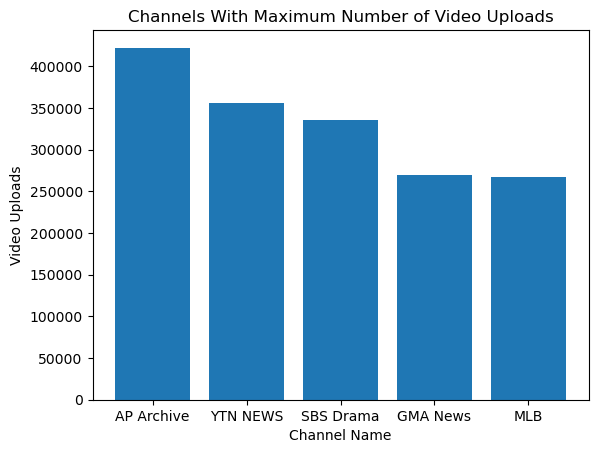

In [33]:
x=top_5['Channel name']
y=top_5['Video Uploads']
plt.xlabel('Channel Name')
plt.ylabel('Video Uploads')
plt.title('Channels With Maximum Number of Video Uploads')
plt.bar(x,y)
plt.show()

# 13. **Find Correlation Matrix**

In [34]:
df.corr()

/tmp/ipykernel_21/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Rank,Grade,Video Uploads,Subscribers,Video views,Avg_views
Rank,1.00,-0.87,-0.07,-0.38,-0.40,-0.15
Grade,-0.87,1.00,0.09,0.43,0.48,0.16
Video Uploads,-0.07,0.09,1.00,0.01,0.09,-0.06
Subscribers,-0.38,0.43,0.01,1.00,0.79,0.29
Video views,-0.40,0.48,0.09,0.79,1.00,0.29
Avg_views,-0.15,0.16,-0.06,0.29,0.29,1.00


# 14. **Which Grade Has A Maximum Number of Video Uploads?**

In [35]:
grade=df.groupby('Grade')['Video Uploads'].sum().sort_values(ascending=False)

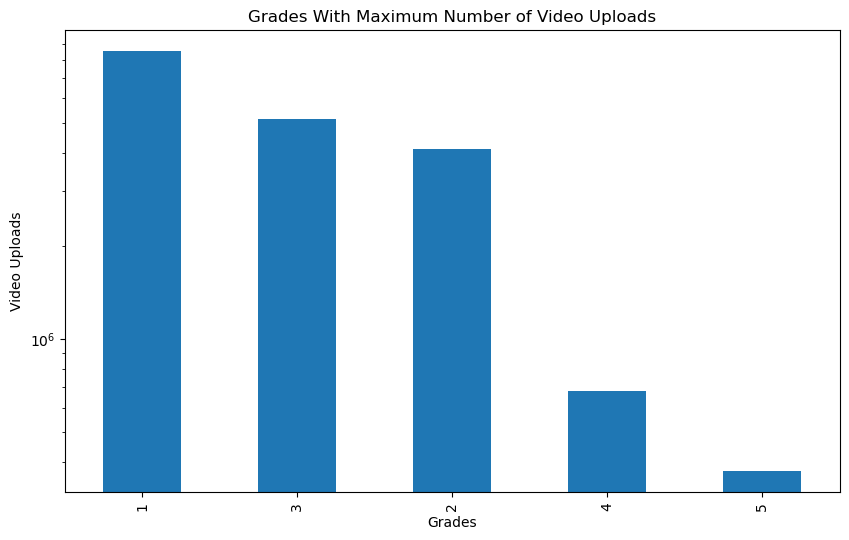

In [36]:
ax=grade.plot(kind='bar',logy=True,figsize=(10,6))
plt.xlabel('Grades')
plt.ylabel('Video Uploads')
plt.title('Grades With Maximum Number of Video Uploads')
plt.show()

# 15. **Which Grade Has The Highest Average Views?**

In [37]:
df.head(1)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Avg_views
0,1,5,Zee TV,82757,18752951,20869786591,252181.53


In [38]:
grade_avg_views=df.groupby('Grade')['Avg_views'].sum().sort_values(ascending=False)

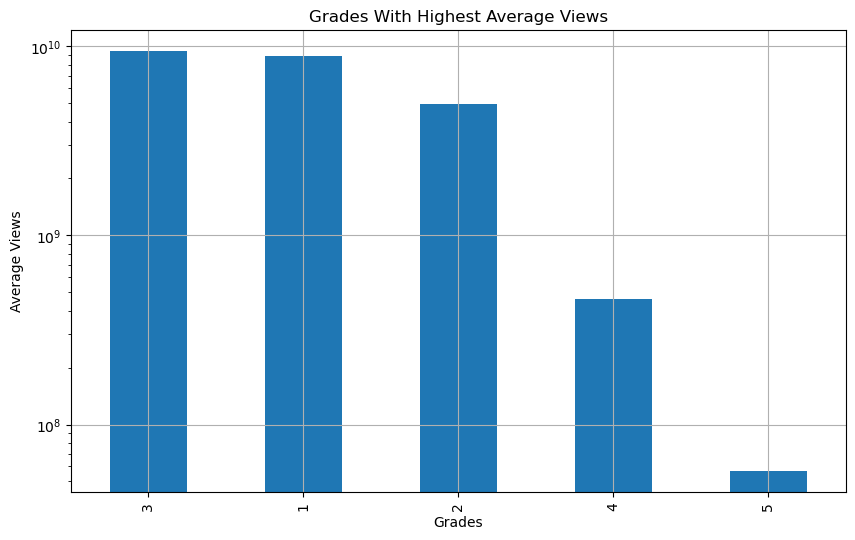

In [39]:
ax=grade_avg_views.plot(kind='bar',logy=True,figsize=(10,6))
plt.xlabel('Grades')
plt.ylabel('Average Views')
plt.title('Grades With Highest Average Views')
plt.grid(True)
plt.show()

# 16. **Which Grade Has The Highest Number of Subscribers?**

In [40]:
grade_subs=df.groupby('Grade')['Subscribers'].sum().sort_values(ascending=False)

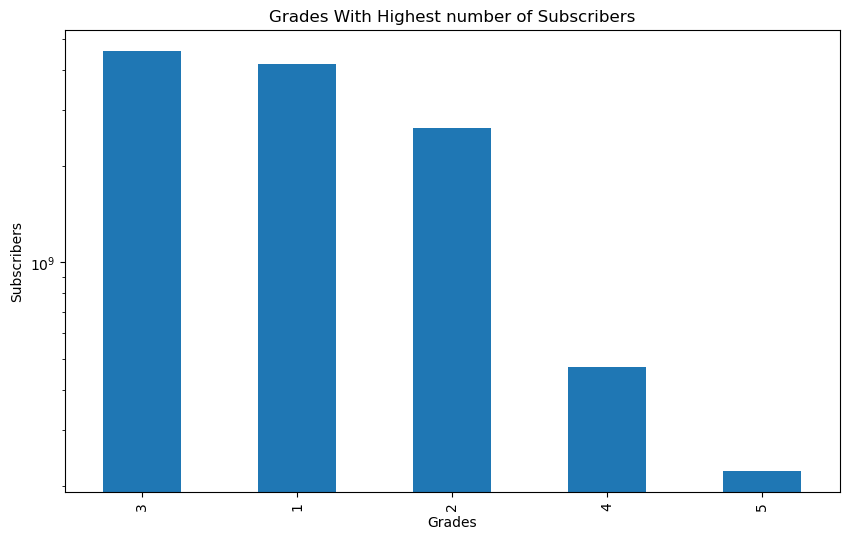

In [41]:
ax=grade_subs.plot(kind='bar',logy=True,figsize=(10,6))
plt.xlabel('Grades')
plt.ylabel('Subscribers')
plt.title('Grades With Highest number of Subscribers')
plt.show()

# 17. **Which Grade Has The Highest Video Views**

In [42]:
grade_views=df.groupby('Grade')['Video views'].sum().sort_values(ascending=False)

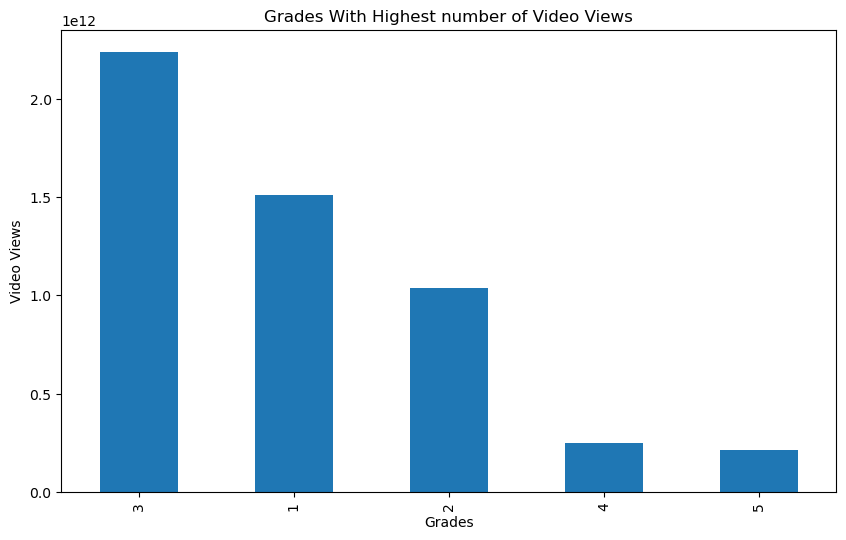

In [43]:
ax=grade_views.plot(kind='bar',figsize=(10,6))
plt.xlabel('Grades')
plt.ylabel('Video Views')
plt.title('Grades With Highest number of Video Views')
plt.show()

# **Overall Analysis Based on Grade**

In [44]:
data=df.groupby('Grade').mean()

/tmp/ipykernel_21/3366762022.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data=df.groupby('Grade').mean()


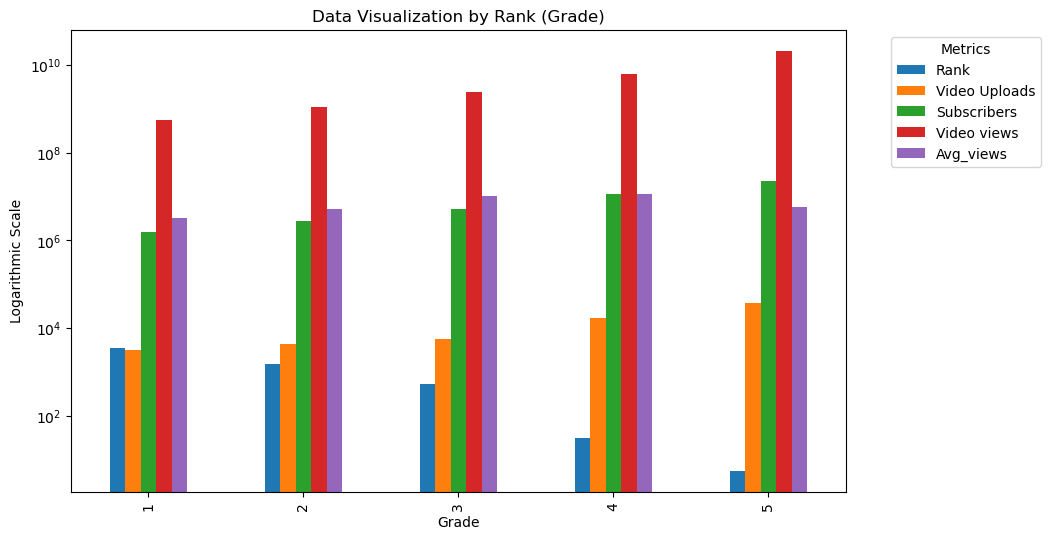

In [45]:
ax=data.plot(kind='bar',logy=True,figsize=(10,6))
plt.xlabel('Grade')
plt.ylabel('Logarithmic Scale')
plt.title('Data Visualization by Rank (Grade)')
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()